![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png)
# Intro to Regression with Tensorflow & Keras

**OBJECTIVES**

- Build regression models using `tensorflow` & `keras`
- Refine models by adjusting the architecture of a network
- Use regularization to attempt performance improvement
- Save and reuse the model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
cali = fetch_california_housing()
X, y = cali.data, cali.target

### Part 1

Load the california housing data and create a dataframe called `cali_df` below.  Make sure to add the target feature and name this `price`. 

In [3]:
# Create dataframe
cali_df = pd.DataFrame(X, columns=cali.feature_names)

In [4]:
# add target feature to dataframe
cali_df['price'] = y

In [5]:
# check dataframe
cali_df.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


In [6]:
cali_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### Part 2

Create a train/test split using some of the features in your X and setting y to be the `price` column.

In [7]:
# Assign X and y
X = cali_df[['MedInc', 'HouseAge', 'AveRooms']]
y = cali_df['price']

In [8]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42)

### Part 3

Setup a `Sequential` model with one layer containing 24 nodes.  Make sure to include the output layer and use a relu activation for the hidden layer.

In [9]:
# instantiate with parameters
model = Sequential()
model.add(Input(shape=(3,)))

model.add(Dense(24, activation='relu'))
model.add(Dense(1))

### Part 3 - continued

Set up the compilation of the network.  Use an adam optimizer and appropriate loss function with the mean squared error metric.

In [10]:
# compile 
model.compile(loss='mae', 
              optimizer='adam', 
              metrics=['mse'])

### Part 4

Fit the model on the training data with 100 epochs (and sequester the output with `verbose = 0`). Save the fit model to the variable `history`.

In [11]:
# fit model
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=100,
                    verbose=0)

### Part 5

Use `matplotlib` to plot the training loss and validation loss, and the training mean squared error alongside the validation data.  Side by side subplots please.

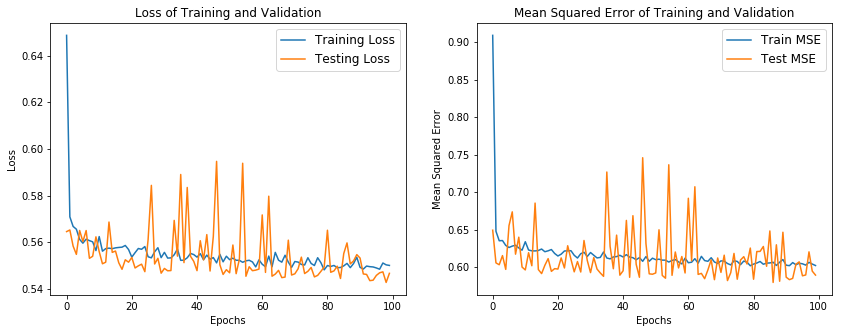

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss');
plt.plot(history.history['val_loss'], label='Testing Loss');
plt.legend(fontsize=12)
plt.title('Loss of Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss');

plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Test MSE')
plt.legend(fontsize=12)
plt.title('Mean Squared Error of Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error');

### Part 6

Let's make a second network that is a bit deeper and more complex. Also, let's now use all the features and see if we help the model.  Use 3 layers, with 64, 128, and 64 nodes respectively in the hidden layers and a `relu` activation function.

In [13]:
# instantiate model_3 with 3 layers

model_3 = Sequential()
model_3.add(Input(shape=(3,)))
model_3.add(BatchNormalization())
model_3.add(Dense(64,activation='relu'))
model_3.add(Dense(128, activation= 'relu'))
model_3.add(Dense(64,activation='relu'))
model_3.add(Dense(1))

In [14]:
# compile

model_3.compile(loss='mae', 
                optimizer='adam', 
                metrics=['mse'])

In [15]:
# fit model
history_3 = model_3.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=100,
                    verbose=0)

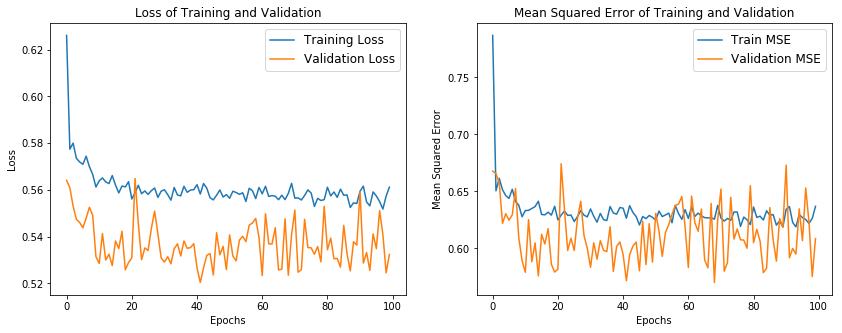

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))

plt.subplot(1, 2, 1)
plt.plot(history_3.history['loss'], label='Training Loss');
plt.plot(history_3.history['val_loss'], label='Validation Loss');
plt.legend(fontsize=12)
plt.title('Loss of Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss');

plt.subplot(1, 2, 2)
plt.plot(history_3.history['mse'], label='Train MSE')
plt.plot(history_3.history['val_mse'], label='Validation MSE')
plt.legend(fontsize=12)
plt.title('Mean Squared Error of Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error');

### Part 7

Add a `BatchNormalization` layer prior to our first dense layer in the network above and repeat the fit.

##### Does this change anything?

### Part 8

Early Stopping.  It seems that we may not need all 100 epochs to train the data.  Include an `EarlyStopping` callback in your model from above.  Set the `patience` equal to 5.  How many epochs do you think are appropriate?

In [17]:
early_stop = EarlyStopping(monitor='val_loss',
                           patience=5)

In [18]:
model_es = Sequential()
model_es.add(Input(shape=(3,)))
model_es.add(BatchNormalization())
model_es.add(Dense(64,activation='relu'))
model_es.add(Dense(128, activation= 'relu'))
model_es.add(Dense(64,activation='relu'))
model_es.add(Dense(1))

# compile
model_es.compile(loss='mae', 
                optimizer='adam', 
                metrics=['mse'])

# fit model with early stopping
history_es = model_es.fit(X_train, y_train, 
                         validation_data=(X_test, y_test), 
                         epochs=100,
                         verbose=0,
                         callbacks=[early_stop])

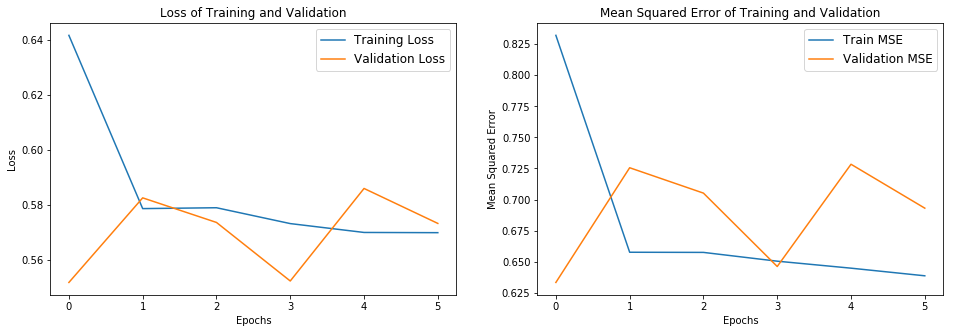

In [19]:
# plot
fig, ax = plt.subplots(1, 2, figsize=(16,5))

plt.subplot(1, 2, 1)
plt.plot(history_es.history['loss'], label='Training Loss');
plt.plot(history_es.history['val_loss'], label='Validation Loss');
plt.legend(fontsize=12)
plt.title('Loss of Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss');


plt.subplot(1, 2, 2)
plt.plot(history_es.history['mse'], label='Train MSE')
plt.plot(history_es.history['val_mse'], label='Validation MSE')
plt.legend(fontsize=12)
plt.title('Mean Squared Error of Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error');

### Part 9

Adding `Dropout`.  Let's add a 5% dropout to the second layer, and a 20% dropout to the third layer and see if we end up stopping sooner or performing better.

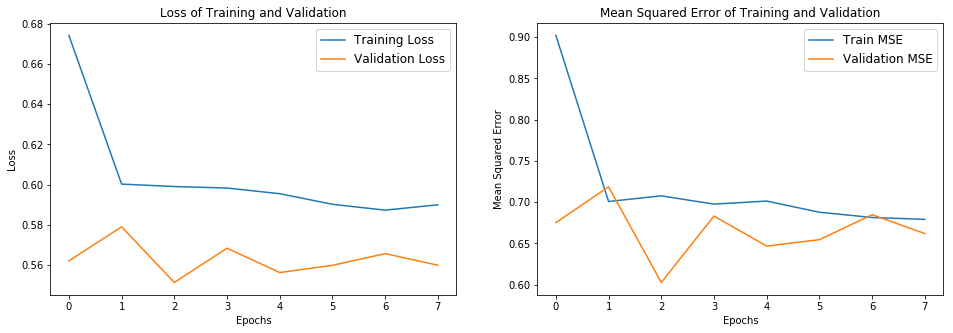

In [20]:
model_dropout = Sequential()
model_dropout.add(Input(shape=(3,)))
model_dropout.add(BatchNormalization())
model_dropout.add(Dense(64,activation='relu'))
model_dropout.add(Dense(128, activation= 'relu'))
model_dropout.add(Dropout(0.05))
model_dropout.add(Dense(64,activation='relu'))
model_dropout.add(Dropout(.20))
model_dropout.add(Dense(1))

# compile
model_dropout.compile(loss='mae', 
                optimizer='adam', 
                metrics=['mse'])

# fit model with early stopping
history_dropout = model_dropout.fit(X_train, y_train, 
                         validation_data=(X_test, y_test), 
                         epochs=100,
                         verbose=0,
                         callbacks=[early_stop])

# plot
fig, ax = plt.subplots(1, 2, figsize=(16,5))

plt.subplot(1, 2, 1)
plt.plot(history_dropout.history['loss'], label='Training Loss');
plt.plot(history_dropout.history['val_loss'], label='Validation Loss');
plt.legend(fontsize=12)
plt.title('Loss of Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss');


plt.subplot(1, 2, 2)
plt.plot(history_dropout.history['mse'], label='Train MSE')
plt.plot(history_dropout.history['val_mse'], label='Validation MSE')
plt.legend(fontsize=12)
plt.title('Mean Squared Error of Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error');

### Part 9 - continued: RMSE vs. Baseline

Compare the model aboves performance to that of the baseline model for the data.

In [21]:
# Baseline
y_null = np.full_like(y_test, y.mean())
nullmodel_error = mean_squared_error(y_test, y_null, squared=False)
print(f'RMSE of the null model is {nullmodel_error}.')

RMSE of the null model is 1.150324721993764.


In [22]:
# create preds
y_preds = model_dropout.predict(X_test)

In [23]:
# Evaluate model
error = mean_squared_error(y_test, y_preds, squared=False)
print(f'RMSE of the dropout model is {error}.')

RMSE of the dropout model is 0.8135841798901408.


### Part 10: Regularization and Scaling

Finally, we want to see if regularizing will improve the model.  Feed a model that is identical to the one above including dropout and include `l2` regularization in each of the dense layers of 0.01.  What is the RMSE of this model?  How does it compare to the baseline?

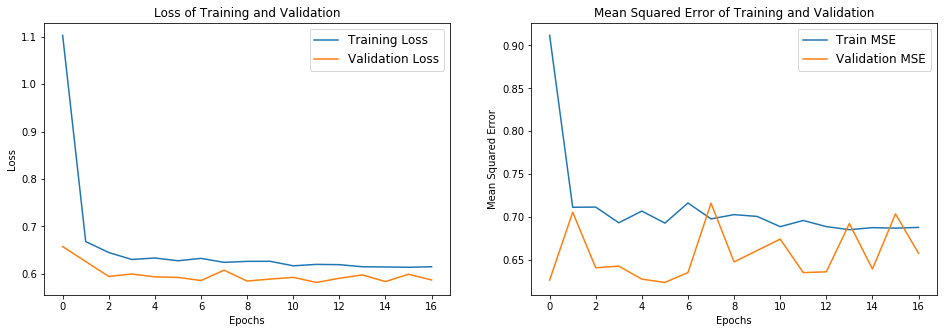

In [24]:
model_reg = Sequential()
model_reg.add(Input(shape=(3,)))
model_reg.add(BatchNormalization())
model_reg.add(Dense(64,activation='relu', kernel_regularizer=l2(0.01)))
model_reg.add(Dense(128, activation= 'relu', kernel_regularizer=l2(0.01)))
model_reg.add(Dropout(0.05))
model_reg.add(Dense(64,activation='relu', kernel_regularizer=l2(0.01)))
model_reg.add(Dropout(.20))
model_reg.add(Dense(1))

# compile
model_reg.compile(loss='mae', 
                optimizer='adam', 
                metrics=['mse'])

# fit model with early stopping
history_reg = model_reg.fit(X_train, y_train, 
                         validation_data=(X_test, y_test), 
                         epochs=100,
                         verbose=0,
                         callbacks=[early_stop])

# plot
fig, ax = plt.subplots(1, 2, figsize=(16,5))

plt.subplot(1, 2, 1)
plt.plot(history_reg.history['loss'], label='Training Loss');
plt.plot(history_reg.history['val_loss'], label='Validation Loss');
plt.legend(fontsize=12)
plt.title('Loss of Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss');


plt.subplot(1, 2, 2)
plt.plot(history_reg.history['mse'], label='Train MSE')
plt.plot(history_reg.history['val_mse'], label='Validation MSE')
plt.legend(fontsize=12)
plt.title('Mean Squared Error of Training and Validation')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error');

### Part 11: Saving the Model

Save the model as `cali_housing.h5`.  

In [25]:
model_reg.save('cali_housing.h5')